# TP 3 Regression linéaire
Dans ce TP, nous aimerions prédire l'admission d'un étudiant à une specialité donnée selon ses notes dans deux matières.

Pour ce faire, nous étudierons un ensemble de données avec l'admission  (y) et les notes des deux modules (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [ ]:
# données
data = np.genfromtxt('/content/drive/MyDrive/AI/TP3/data.csv', delimiter=',', dtype=float)
data.shape

(100, 3)

Dans ces données (data), la première colonne represente la première note, la deuxieme colonne la deuxième note et la troisième colonne represente l'admission à la specialité (1 admis 0 non admis).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [ ]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0:2]))
y = data[:, 2]
y = y.reshape(len(y), 1)

In [ ]:
print('X', X.shape ,' y ', y.shape)

X (100, 3)  y  (100, 1)


# Descente du Gradient : Préparation des fonctions

0- Fonction Logistique (Sigmoid)

In [ ]:
def Sigmoid(z):
    # pour une valeur donnée, cette fonction calculera sa sigmoid
    return 1/(1 + np.exp(-z))

Fonction Hestimation qui renvoi la prédiction de la classe en fonction de features

In [ ]:
def hest(X, theta):
  return Sigmoid(X.dot(theta))

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1,\theta_2)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [ ]:
def computeCost(X, y, theta):
    return -np.mean(y * np.log(hest(X, theta)) + (1 - y) * np.log(1 - hest(X, theta)))

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_2,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [ ]:
def gradientDescent(X, y, theta, alpha=0.9, iterations=10000):

    # initialisation des liste des historiques
    cost_list = []
    theta0_list = []
    theta1_list = []
    theta2_list = []

    H = np.zeros((X.shape[0], 1))
    m = len(y)

    # Sauvegarde de la première valeur 
    cost_list.append(computeCost(X, y, theta))
    theta0_list.append(theta[0])
    theta1_list.append(theta[1])
    theta2_list.append(theta[2])

    for iter in tqdm(range(iterations)):
      # Calcule de l'hestimation
      H = hest(X, theta)
      # Calcule de l'erreur entre l'estimation et la vérité terrain
      err = np.subtract(H, y)
      # Mise a jours des valeurs de theta
      new_theta = alpha * 1/m * np.sum(np.dot(X.T, err),axis=1).reshape(-1,1)
      theta = np.subtract(theta, new_theta)
      # Sauvegarde des résulat de l'itération
      theta0_list.append(theta[0])
      theta1_list.append(theta[1])
      theta2_list.append(theta[2])
      cost_list.append(computeCost(X, y, theta))
      
    return theta, theta0_list,theta1_list,theta2_list ,cost_list

Fonction predict qui prédit la classe de X  
le seuil est là pour changer la précision du modèle, par défaut il est a 0.5

In [ ]:
def predict(X, theta, seuil=0.5):
  preds = hest(np.asarray(X), theta)
  pred_class = [1 if i >= seuil else 0 for i in preds]
  return np.array(pred_class)

Fonction qui renvoi la probabilité d'appartenance a une classe

In [ ]:
def predictProba(X, theta):
  preds = hest(np.asarray(X), theta)
  return np.array(preds)

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$, $\theta_1$ et $\theta_2$

In [ ]:
theta = np.zeros((X.shape[1], 1))
theta

array([[0.],
       [0.],
       [0.]])

Calculer le cout initial

In [ ]:
initialCost=computeCost(X, y, theta)
initialCost

0.6931471805599453

Appel des la fonction de calcul du gradient

In [ ]:
theta = np.zeros((X.shape[1], 1)) # ajouté ici pour éviter de rerun toute les cellule a chaque fois 
# paramètres
iterations = 30000;
alpha = 0.09;
# Appel
theta, theta0_list,theta1_list,theta2_list, cost_list  = gradientDescent(X, y, theta, alpha, iterations);

100%|██████████| 30000/30000 [00:02<00:00, 10684.96it/s]


Valeurs de $\theta_0$,$\theta_1$ et $\theta_2$ après entrainement

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve

In [ ]:
accuracy_score(y, predict(X, theta))

0.89

In [ ]:
theta

array([[-23.27553207],
       [  0.95576857],
       [  0.93103277]])

Le cours lors de la dernière itération

In [ ]:
cost_list[-1]

0.20405997804079049

Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

# Dessin de la limite de decision (Descision Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice d nos données

In [ ]:
def drawLine(X, theta):
  
  b = theta[0]
  w1, w2 = theta[1:3]

  c = -b/w2
  m = -w1/w2

  xmin, xmax = X.min(), X.max()

  x = np.array([xmin, xmax])
  y = m*x + c

  plt.plot(x, y, 'k')

# Affichage 
Graphe representant les acceptations selon les caracteristiques

Text(0, 0.5, 'Note module 2')

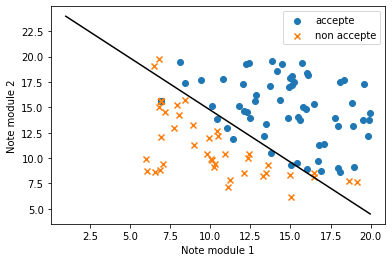

In [ ]:
plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="accepte",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="non accepte",marker ='x')
drawLine(X, theta)
plt.legend()
plt.xlabel('Note module 1')
plt.ylabel('Note module 2')

Traçage de $\theta_0$, $\theta_1$ et $\theta_2$ en fonction du nombre d'itération

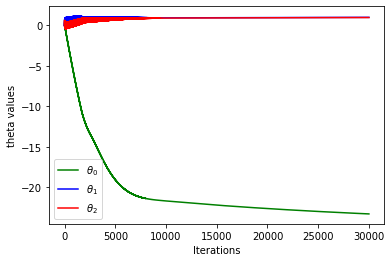

In [ ]:
plt.plot(theta0_list[0:len(theta0_list)], color='green', label='$\\theta_{0}$')
plt.plot(theta1_list[0:len(theta1_list)], color='blue', label='$\\theta_{1}$')
plt.plot(theta2_list[0:len(theta2_list)], color='red', label='$\\theta_{2}$')
plt.xlabel("Iterations")
plt.ylabel("theta values")
plt.legend()

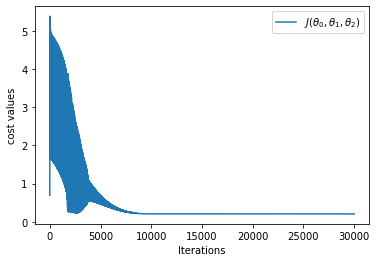

In [ ]:
plt.plot(cost_list[0:len(cost_list)], label='$J(\\theta_{0}, \\theta_{1}, \\theta_{2})$')
plt.xlabel("Iterations")
plt.ylabel("cost values")
plt.legend()

Prédire des valeurs de y

In [ ]:
# Predire pour des notes note1= 9 et note2=17
myPrediction = predict([1, 9, 17], theta)
myPrediction, predictProba([1, 9, 17], theta)

(array([1]), array([0.76023023]))

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(tol=0.09, max_iter=9000)

In [ ]:
logisticRegr.fit(X[:, 1:3], y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=9000, tol=0.09)

Génération de i exemple aléatoire pour tester notre model ainsi que le model de sklearn sur d'autre donnée que le train set

In [ ]:
import random as rand
preds = []
i = 10000
for i in range(i):
  preds.append([1, rand.uniform(0, 21), rand.uniform(0, 20)])

In [ ]:
np.array(preds)[:5]

array([[ 1.        , 14.27120966,  9.99791947],
       [ 1.        ,  4.16079961,  3.67845459],
       [ 1.        ,  4.64790513, 13.53357805],
       [ 1.        , 15.76331627, 13.20791918],
       [ 1.        ,  8.79446723,  9.36773939]])

Affichage des 10 première prédiction de sklearn et de notre implémentation a titre comparatif

In [ ]:
y_pred = logisticRegr.predict(np.array(preds)[:, 1:3])
myPrediction = predict(preds, theta)
y_pred[:10], myPrediction[:10]

(array([0., 0., 0., 1., 0., 0., 0., 0., 0., 1.]),
 array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1]))

Utilisation de quelques metrique a titre comparatif

Accuracy

In [ ]:
accuracy_score(y, predict(X, theta)), accuracy_score(y, logisticRegr.predict(X[:, 1:3]))

(0.89, 0.89)

Matrice de confusion

In [ ]:
from seaborn import heatmap

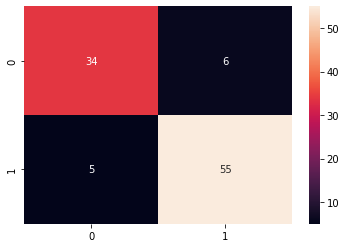

In [ ]:
heatmap(confusion_matrix(y, predict(X, theta)), annot=True)

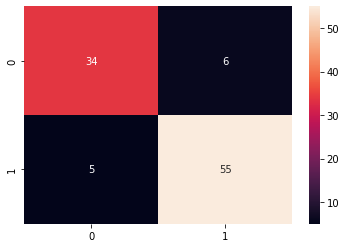

In [ ]:
heatmap(confusion_matrix(y, logisticRegr.predict(X[:, 1:3])), annot=True)

Courbe Roc

In [ ]:
fpr1, tpr1, _ = roc_curve(y,  logisticRegr.predict_proba(X[:, 1:3])[::,1])
fpr2, tpr2, _ = roc_curve(y,  predictProba(X, theta))

Text(0.5, 0, 'False Positive Rate')

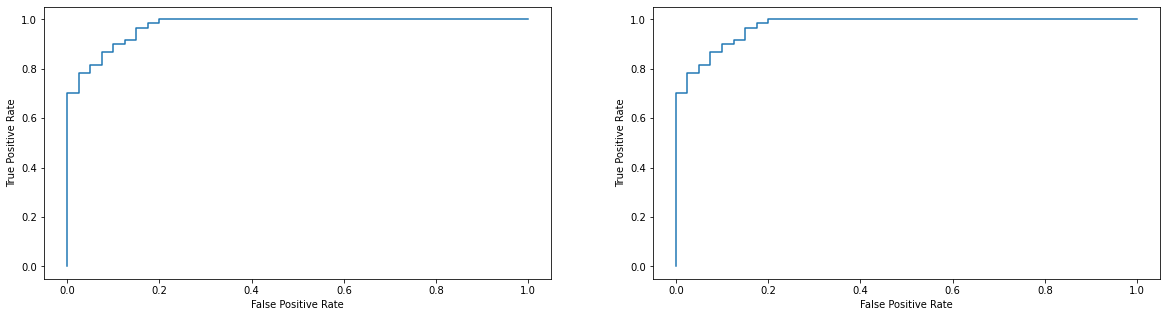

In [ ]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(fpr1,tpr1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.subplot(1, 2, 2) # index 2
plt.plot(fpr2,tpr2)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Comparaison entre les valeur theta de notre implémentation et celle de sklearn

In [ ]:
print(theta.reshape(1, -1))
print(logisticRegr.intercept_, logisticRegr.coef_)

[[-23.27553207   0.95576857   0.93103277]]
[-22.96736174] [[0.94273608 0.91838238]]


on vectories les theta de sklearn pour dessiner la limite de décision de sklearn pour comparer entre les 2 graphes

In [ ]:
parameters = np.array([logisticRegr.intercept_[0], logisticRegr.coef_[0][0], logisticRegr.coef_[0][1]])

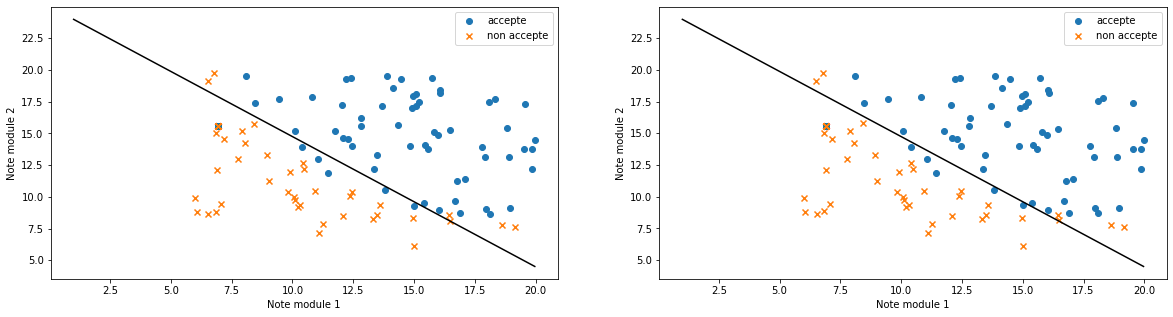

In [ ]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="accepte",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="non accepte",marker ='x')
drawLine(X, parameters)
plt.xlabel('Note module 1')
plt.ylabel('Note module 2')
plt.legend()

plt.subplot(1, 2, 2) # index 2
plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="accepte",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="non accepte",marker ='x')
drawLine(X, theta)
plt.xlabel('Note module 1')
plt.ylabel('Note module 2')
plt.legend()

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

In [ ]:
pass

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 25 Mars 2022 à 22h


In [ ]:
# bonne chance